<p style = "font-size:30px; color: #007580 "><strong> Data Description </strong></p>

### Problem Statement : 
- The aim of the project is to classify the road side signs category using CNN (with different architectures).
    

### About Dataset:
- The dataset contains 80,000 synthetic images of road signs.
- Each image has a *.png format and a size of 224 x 224 pixels.
- There are 8 classes in the data that correspond to the categories of signs in Russia.
- For the test 3000 images per category.
- For train 7000 images per category.


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import random
import os
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from keras.layers import Conv2D, Dense, Flatten, Rescaling, AveragePooling2D, Dropout
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

In [3]:
# Import data path
data_dir = '/kaggle/input/russian-road-signs-categories-dataset'
train_path = '/kaggle/input/russian-road-signs-categories-dataset/train'
test_path = '/kaggle/input/russian-road-signs-categories-dataset/test'


In [4]:
#Initialize height and weight
height = 50
width = 50


In [5]:
# Initialize seeds and batch size
batch_size = 150
seed = 42

In [6]:
# Image rescaling 
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(train_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 44800 images belonging to 8 classes.
Found 11200 images belonging to 8 classes.


**We have 8 classes in training dataset in which 44800 images are there and 8 classes in testing dataset in which 11200 images are there**

### Basic CNN Model

In [7]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(height,width,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.25),
    
    keras.layers.Dense(8, activation='softmax')
])

2022-12-27 13:03:40.660722: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-27 13:03:40.741883: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-27 13:03:40.742732: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-27 13:03:40.743870: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [8]:
alpha=0.01
epochs=15
optim = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
cnn = model.fit(train_dataset,
                steps_per_epoch = len(train_dataset),
                epochs = epochs,
                validation_data = test_dataset,
                validation_steps = len(test_dataset))



2022-12-27 13:03:43.967308: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-12-27 13:03:46.319641: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


299/299 [==============================] - 306s 999ms/step - loss: 0.3349 - accuracy: 0.8943 - val_loss: 0.1854 - val_accuracy: 0.9393
Epoch 2/15
299/299 [==============================] - 172s 575ms/step - loss: 0.0864 - accuracy: 0.9703 - val_loss: 0.1581 - val_accuracy: 0.9469
Epoch 3/15
299/299 [==============================] - 175s 584ms/step - loss: 0.0502 - accuracy: 0.9832 - val_loss: 0.0359 - val_accuracy: 0.9881
Epoch 4/15
299/299 [==============================] - 171s 572ms/step - loss: 0.0319 - accuracy: 0.9895 - val_loss: 0.6708 - val_accuracy: 0.8545
Epoch 5/15
299/299 [==============================] - 170s 568ms/step - loss: 0.0355 - accuracy: 0.9886 - val_loss: 0.2501 - val_accuracy: 0.9548
Epoch 6/15
299/299 [==============================] - 170s 569ms/step - loss: 0.0295 - accuracy: 0.9900 - val_loss: 1.9660 - val_accuracy: 0.8149
Epoch 7/15
299/299 [==============================] - 169s 566ms/step - loss: 0.0213 - accuracy: 0.9929 - val_loss: 0.1718 - val_accura

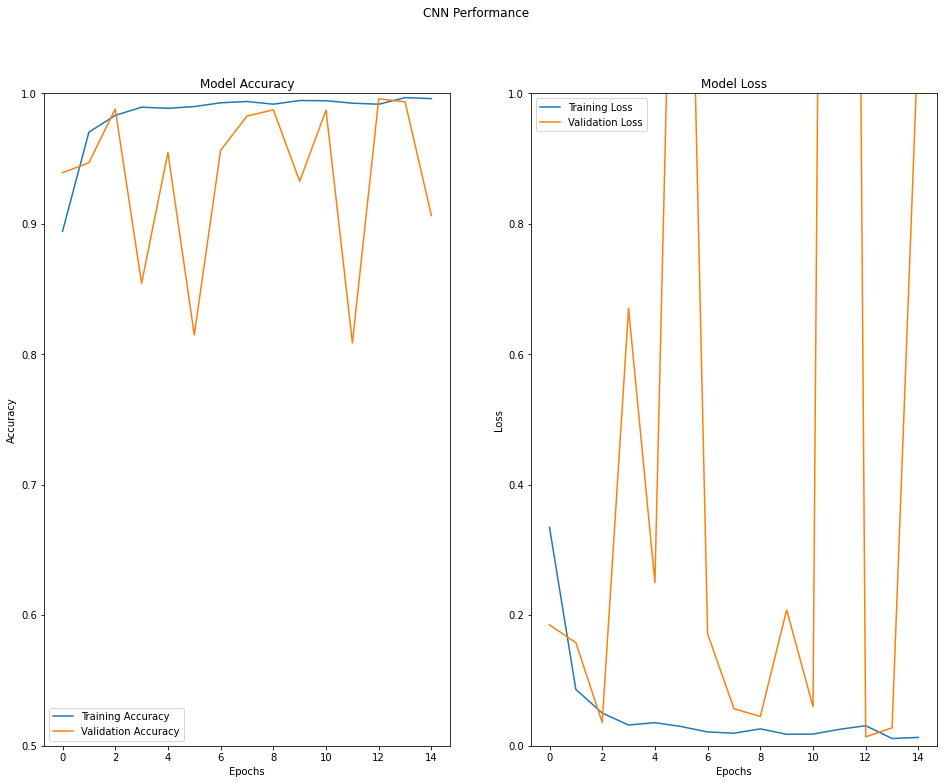

<Figure size 720x504 with 0 Axes>

In [10]:
# Graphical representation of Model accuracy and loss
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(cnn.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('CNN Performance')
plt.show()

### LeNet_5 Model

In [12]:
LeNet_5 = Sequential() 
LeNet_5.add(Conv2D(filters=16, kernel_size=(5,5),  input_shape=(height,width,3))),
LeNet_5.add(BatchNormalization())
LeNet_5.add(Activation('relu'))  
LeNet_5.add(AveragePooling2D())
LeNet_5.add(Conv2D(filters=32, kernel_size=(5,5)))
LeNet_5.add(BatchNormalization())
LeNet_5.add(Activation('relu')) 
LeNet_5.add(AveragePooling2D())
LeNet_5.add(Flatten())
LeNet_5.add(Dense(units = 512))
LeNet_5.add(BatchNormalization())
LeNet_5.add(Activation('relu')) 
LeNet_5.add(Dense(units = 120))
LeNet_5.add(BatchNormalization())
LeNet_5.add(Activation('relu')) 
LeNet_5.add(Dense(units = 8))
LeNet_5.add(BatchNormalization())
LeNet_5.add(Activation('softmax')) 

https://analyticsindiamag.com/complete-tutorial-on-lenet-5-guide-to-begin-with-cnns/

In [13]:
alpha=0.01
epochs=15
optim = keras.optimizers.Adam(learning_rate=0.01)
LeNet_5.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
cnn2 = LeNet_5.fit(train_dataset,
                steps_per_epoch = len(train_dataset),
                epochs = epochs,
                validation_data = test_dataset,
                validation_steps = len(test_dataset))

Epoch 1/15
299/299 [==============================] - 170s 565ms/step - loss: 0.2132 - accuracy: 0.9535 - val_loss: 0.1769 - val_accuracy: 0.9485
Epoch 2/15
299/299 [==============================] - 168s 562ms/step - loss: 0.0475 - accuracy: 0.9887 - val_loss: 0.1115 - val_accuracy: 0.9717
Epoch 3/15
299/299 [==============================] - 171s 571ms/step - loss: 0.0228 - accuracy: 0.9945 - val_loss: 0.9231 - val_accuracy: 0.7461
Epoch 4/15
299/299 [==============================] - 169s 567ms/step - loss: 0.0171 - accuracy: 0.9957 - val_loss: 0.1163 - val_accuracy: 0.9569
Epoch 5/15
299/299 [==============================] - 172s 577ms/step - loss: 0.0132 - accuracy: 0.9966 - val_loss: 2.1497 - val_accuracy: 0.5200
Epoch 6/15
299/299 [==============================] - 173s 577ms/step - loss: 0.0067 - accuracy: 0.9985 - val_loss: 0.0894 - val_accuracy: 0.9633
Epoch 7/15
299/299 [==============================] - 171s 572ms/step - loss: 0.0070 - accuracy: 0.9981 - val_loss: 0.6553 -

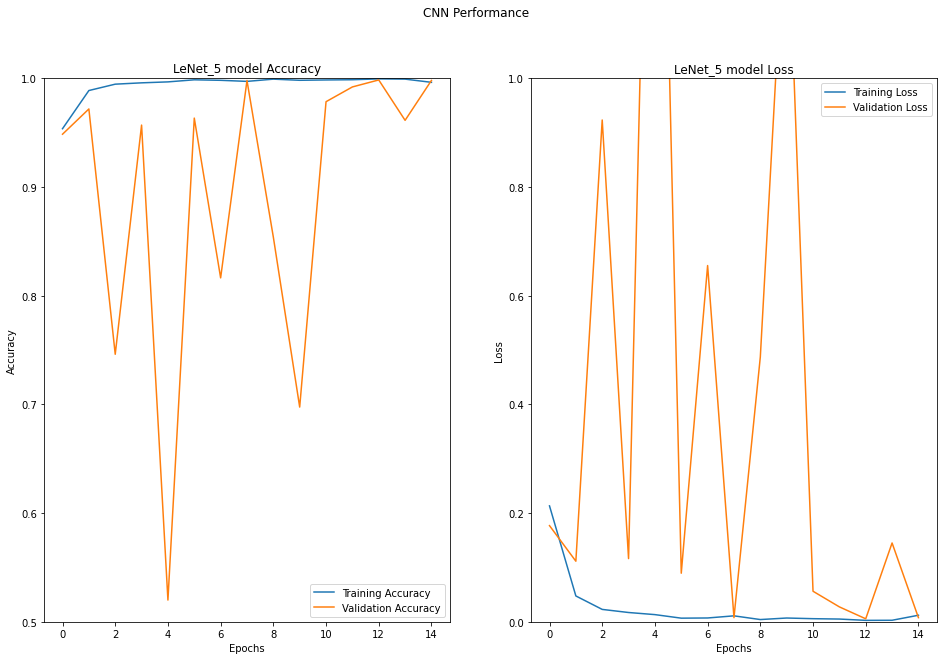

<Figure size 720x504 with 0 Axes>

In [16]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,10)
performance = pd.DataFrame(cnn2.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('LeNet_5 model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('LeNet_5 model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('CNN Performance')
plt.show()

### AlexNet Model

In [17]:
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=16, input_shape=(50,50,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
AlexNet.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
AlexNet.add(Conv2D(filters=48, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

AlexNet.add(Flatten())

AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(Dropout(0.4))


AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(Dropout(0.4))


AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(Dropout(0.4))


AlexNet.add(Dense(8))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))


https://www.mygreatlearning.com/blog/alexnet-the-first-cnn-to-win-image-net/

In [18]:
alpha=0.01
epochs=15
optim = keras.optimizers.Adam(learning_rate=0.01)
AlexNet.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
cnn3 = AlexNet.fit(train_dataset,
                steps_per_epoch = len(train_dataset),
                epochs = epochs,
                validation_data = test_dataset,
                validation_steps = len(test_dataset))

Epoch 1/15
299/299 [==============================] - 176s 583ms/step - loss: 0.3114 - accuracy: 0.9130 - val_loss: 0.3213 - val_accuracy: 0.9094
Epoch 2/15
299/299 [==============================] - 172s 577ms/step - loss: 0.0984 - accuracy: 0.9699 - val_loss: 0.2813 - val_accuracy: 0.9317
Epoch 3/15
299/299 [==============================] - 171s 573ms/step - loss: 0.0503 - accuracy: 0.9852 - val_loss: 0.1151 - val_accuracy: 0.9666
Epoch 4/15
299/299 [==============================] - 171s 574ms/step - loss: 0.0400 - accuracy: 0.9885 - val_loss: 0.7111 - val_accuracy: 0.8480
Epoch 5/15
299/299 [==============================] - 170s 571ms/step - loss: 0.0292 - accuracy: 0.9917 - val_loss: 0.0509 - val_accuracy: 0.9849
Epoch 6/15
299/299 [==============================] - 170s 570ms/step - loss: 0.0212 - accuracy: 0.9936 - val_loss: 0.4350 - val_accuracy: 0.8799
Epoch 7/15
299/299 [==============================] - 169s 567ms/step - loss: 0.0196 - accuracy: 0.9944 - val_loss: 1.0187 -

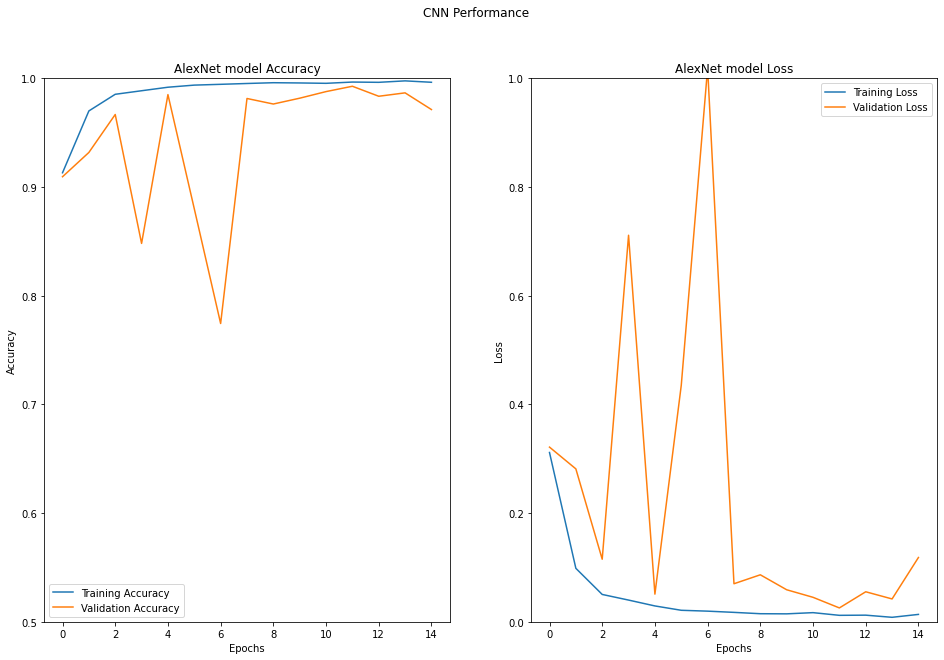

<Figure size 720x504 with 0 Axes>

In [20]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,10)
performance = pd.DataFrame(cnn3.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('AlexNet model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('AlexNet model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('CNN Performance')
plt.show()

### VGG Model

In [21]:
vgg = Sequential()
vgg.add(Conv2D(input_shape=(50,50,3),filters=16,kernel_size=(5,5),padding="same"))
vgg.add(Conv2D(filters=32,kernel_size=(5,5),padding="same", activation="relu"))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg.add(Conv2D(filters=32, kernel_size=(5,5), padding="same"))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))
vgg.add(Conv2D(filters=32, kernel_size=(5,5), padding="same"))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg.add(Conv2D(filters=48, kernel_size=(5,5), padding="same"))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))
vgg.add(Conv2D(filters=48, kernel_size=(5,5), padding="same", activation="relu"))
vgg.add(Conv2D(filters=48, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg.add(Conv2D(filters=64, kernel_size=(5,5), padding="same"))
vgg.add(Conv2D(filters=64, kernel_size=(5,5), padding="same"))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))
vgg.add(Conv2D(filters=64, kernel_size=(5,5), padding="same"))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg.add(Conv2D(filters=80, kernel_size=(5,5), padding="same", activation="relu"))
vgg.add(Conv2D(filters=80, kernel_size=(5,5), padding="same", activation="relu"))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))               
vgg.add(Conv2D(filters=80, kernel_size=(5,5), padding="same"))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg.add(Flatten())
vgg.add(Dense(units=4096))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))               
vgg.add(Dense(units=1700,activation="relu"))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))               
vgg.add(Dense(units=8))
vgg.add(BatchNormalization())
vgg.add(Activation('softmax'))


https://www.geeksforgeeks.org/vgg-16-cnn-model/

In [22]:
alpha=0.01
epochs=15
optim = keras.optimizers.Adam(learning_rate=0.01)
vgg.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
cnn4 = vgg.fit(train_dataset,
                steps_per_epoch = len(train_dataset),
                epochs = epochs,
                validation_data = test_dataset,
                validation_steps = len(test_dataset))

Epoch 1/15
299/299 [==============================] - 172s 571ms/step - loss: 0.7692 - accuracy: 0.7227 - val_loss: 2.6579 - val_accuracy: 0.3986
Epoch 2/15
299/299 [==============================] - 172s 575ms/step - loss: 0.1539 - accuracy: 0.9530 - val_loss: 0.2986 - val_accuracy: 0.9239
Epoch 3/15
299/299 [==============================] - 173s 579ms/step - loss: 0.0641 - accuracy: 0.9829 - val_loss: 0.4539 - val_accuracy: 0.8632
Epoch 4/15
299/299 [==============================] - 177s 592ms/step - loss: 0.0429 - accuracy: 0.9885 - val_loss: 0.1260 - val_accuracy: 0.9584
Epoch 5/15
299/299 [==============================] - 172s 575ms/step - loss: 0.0245 - accuracy: 0.9933 - val_loss: 0.0552 - val_accuracy: 0.9839
Epoch 6/15
299/299 [==============================] - 170s 569ms/step - loss: 0.0199 - accuracy: 0.9950 - val_loss: 0.2970 - val_accuracy: 0.9354
Epoch 7/15
299/299 [==============================] - 169s 564ms/step - loss: 0.0183 - accuracy: 0.9951 - val_loss: 0.1196 -

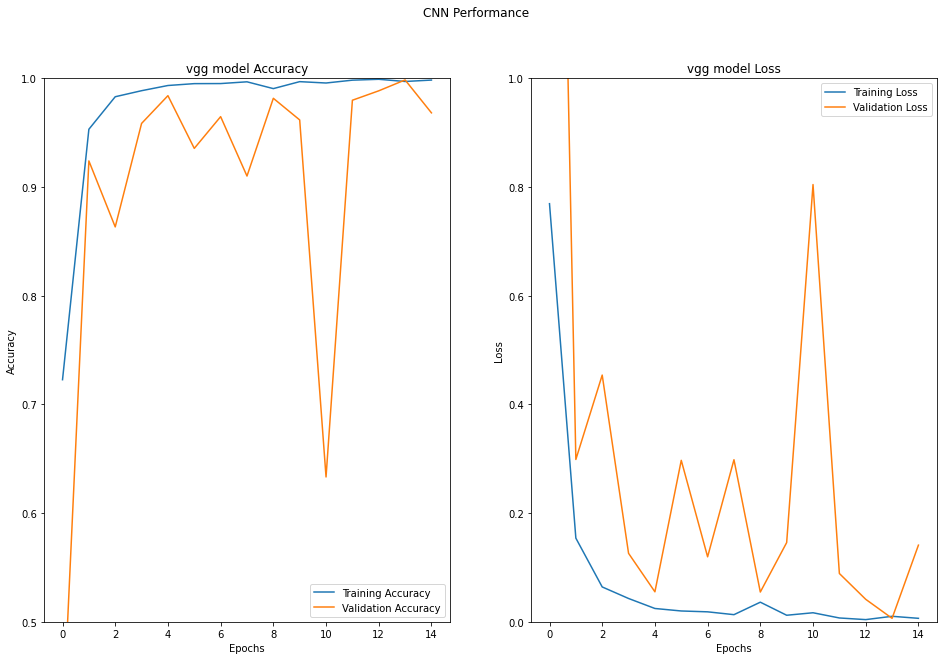

<Figure size 720x504 with 0 Axes>

In [24]:
# Graphical representation of acuuracy and loss
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,10)
performance = pd.DataFrame(cnn4.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('vgg model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('vgg model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('CNN Performance')
plt.show()

In [25]:
# prediction on single image
from keras.preprocessing import image

val_image = image.load_img('/kaggle/input/russian-road-signs-categories-dataset/test/3/3_7011.png',target_size=(height, width))
val_image = image.img_to_array(val_image)
val_image = np.expand_dims(val_image,axis=0)

In [26]:
result = model.predict(val_image)
result

array([[0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
train_dataset.class_indices

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7}

### Conclusion:

- Here we use four types of cnn architecture, among all Lenet_5 cnn architecture gives better accuracy with minimun loss.


**Note - This dataset has 8 directories for train and test and some images are present in every directory so, The prediction may be wrong sometimes.**

In [ ]:
https://www.kaggle.com/code/utkarshaan/road-signs-classification-using-4-cnn-architecture

In [ ]:
https://www.kaggle.com/datasets/sergeykulakin/russian-road-signs-categories-dataset